In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import curvedsky as cs
import binning

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from lbxs4.cmb import CMBLensed
from lbxs4.simulations import LBSky,S4Sky
from lbxs4.filtering import FiltCoadd
from lbxs4.multitracer import CoaddKappa
from lbxs4.delensing import Delenser
from lbxs4.utils import *
from lbxs4.config import *

In [4]:
s4SIM = S4Sky()

In [5]:
mask = hp.ud_grade(s4SIM.nilc_mask,512)

In [6]:
fsky = np.average(mask)

In [7]:
fsky

0.5063616658765823

In [12]:
s4emap_fname ='/global/cfs/cdirs/cmbs4xlb/v1/component_separated/chwide/nilc_Emaps/fits/NILC_CMB-S4_CHWIDE-Emap_NSIDE2048_fwhm2.1_CHLAT-only_medium_cos-NSIDE2048-lmax4096_mc000.fits'
lbemap_fname ='/global/cfs/cdirs/cmbs4xlb/v1/component_separated/cs_products_LB/medium/nilc_standB2_b0b5_rotated/E_rotatedCMB_0000_reso30acm.fits'

In [13]:
s4emap = hp.read_map(s4emap_fname)
lbemap = hp.read_map(lbemap_fname)*mask

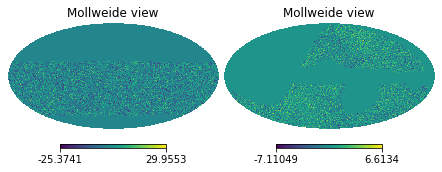

In [14]:
hp.mollview(s4emap,sub=(1,2,1))
hp.mollview(lbemap,sub=(1,2,2))

In [15]:
s4elm = hp.map2alm(s4emap, lmax=1024)
lbelm = hp.map2alm(lbemap, lmax=1024)

In [16]:
rot = hp.Rotator(coord=['C', 'G'])
rot.rotate_alm(s4elm,inplace=True)

In [17]:
s4Emap = hp.alm2map(s4elm,nside=512)*mask

In [18]:
s4elm = hp.map2alm(s4Emap,lmax=1024)

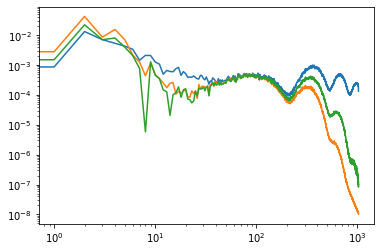

In [19]:
plt.loglog(hp.alm2cl(s4elm)/fsky)
plt.loglog(hp.alm2cl(lbelm)/fsky)
plt.loglog(hp.alm2cl(s4elm,lbelm)/fsky)